# Overfitting vs Underfitting

## Bias vs Variance 
- Bias: 
    - it's the model's tendency to make errors due to simplified assumptions
    - High bias means the model is too simplistic and cannot capture the true patterns and nuances in the data 
    - e.g. trying to fit a straight line into a curved relationship. Linear regression applied to non-linear problem is form of bias 44
    - high bias = underfitting
- Variance: 
    - Model's sensitivity to small fluctuations or nuances in the training data (overcomplicating assumptions)
    - High variance means the model is overly complex and fits the training data too closely 
    - e.g. a decision tree model with too many branches
    - high variance = overfitting

### addressing overfitting and underfitting
- for overfitting:simplify the model 
    - use fewer features
    - reduce complexity of model parameters 
    - apply regularization
- for underfitting: increase the complexity of the model 
    - add more features 
    - increase the amount of training data where you have more diverse instances

In [27]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split #will always use
from sklearn.metrics import accuracy_score #math measures 
from sklearn.tree import DecisionTreeClassifier #decision tree classifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [3]:
#Generate our own data: Create x and y variables using make class
x,y = make_classification(n_samples=90000, #data points
                          n_features=18,  #total number of features for prediction
                          n_informative=4, #features that will be used for ML model
                          n_redundant=12, #num of features that will cause noise
                          random_state=2) #ensure we have the same randomness as prof

#note: x * y are both horizontal arrrays, so later need to convert to vertical array

In [4]:
#view some values in x
x[:20]

array([[-9.15146168e-01, -9.58234234e-01,  4.00350053e+00,
        -1.16957962e+00,  1.31235427e+00,  1.16720558e+00,
         1.48916254e+00,  7.91533533e-01,  6.19137870e-01,
         3.96226832e+00, -2.93145850e+00, -4.31151815e+00,
        -3.54987001e+00, -9.97183224e-01,  2.26712525e-01,
         1.59749733e+00, -1.11512993e+00,  3.60155215e+00],
       [-1.62965867e+00,  4.27837121e-01,  1.07239615e+00,
        -1.32112143e+00, -1.64276464e+00,  1.98390014e+00,
        -2.05344082e+00,  1.88719978e-01, -3.91699962e-01,
         2.37566500e+00,  8.73834744e-01, -8.51895349e-01,
         5.45221497e-03, -2.78281316e-01,  1.26717378e+00,
         1.79364219e+00, -1.28329202e+00,  1.18617020e+00],
       [ 1.72400715e+00, -1.55748830e+00,  1.50309880e+00,
        -1.81028793e+00, -8.37511597e-01,  6.80123203e-01,
        -1.65342806e-01, -5.84031905e-01,  7.41828349e-01,
        -2.41962498e+00, -2.60131029e+00, -3.60856067e-01,
        -5.61256701e-01, -2.57619349e-01,  2.09021669e

In [5]:
#optional step - for data display only. show data in tabular format 
pd.DataFrame(np.hstack((x,y.reshape(-1,1)))) #join x & y, concevert y into a vertical column. 

#hstack() takes 1 positional argument but 2 were given, therefore need to use additional ()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.915146,-0.958234,4.003501,-1.169580,1.312354,1.167206,1.489163,0.791534,0.619138,3.962268,-2.931458,-4.311518,-3.549870,-0.997183,0.226713,1.597497,-1.115130,3.601552,1.0
1,-1.629659,0.427837,1.072396,-1.321121,-1.642765,1.983900,-2.053441,0.188720,-0.391700,2.375665,0.873835,-0.851895,0.005452,-0.278281,1.267174,1.793642,-1.283292,1.186170,0.0
2,1.724007,-1.557488,1.503099,-1.810288,-0.837512,0.680123,-0.165343,-0.584032,0.741828,-2.419625,-2.601310,-0.360856,-0.561257,-0.257619,0.209022,-0.499038,1.670271,1.146012,0.0
3,1.493180,-0.615408,2.746625,-1.571029,-0.657131,1.443767,-2.299731,-0.153087,-0.712489,1.154912,-2.803760,-4.039223,-1.786585,-2.258854,-0.886571,0.485662,-2.027974,-0.133158,1.0
4,0.278379,-0.717891,1.239263,0.202299,1.590907,-0.589205,2.134275,0.303407,0.977623,0.548217,-1.753008,-1.302399,-1.648625,-0.101723,0.529778,-0.200561,0.427007,1.312180,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,2.056433,-1.889946,2.001512,0.764780,3.686820,-2.106518,4.864307,0.284488,0.153409,-0.957061,-4.423295,-2.195691,-3.182606,-0.273270,-0.946359,-1.605704,1.701569,1.685504,0.0
89996,-0.834247,-0.443990,1.824342,-0.167188,1.237163,0.191257,1.694280,0.565917,1.574625,2.238270,-1.262308,-1.859922,-1.912773,-0.135584,1.191608,0.770665,-0.273578,2.167490,1.0
89997,1.787583,-1.664080,1.681517,-1.481538,-0.143162,0.290815,0.639970,-0.450012,-0.689668,-2.186482,-2.984734,-0.707185,-1.033390,-0.269881,-0.007127,-0.648711,1.711200,1.335945,0.0
89998,0.898946,-0.819804,0.749571,0.393158,1.631513,-0.996701,2.211275,0.112658,-0.566082,-0.552221,-1.853721,-0.778746,-1.304564,-0.035058,-0.543048,-0.761582,0.856409,0.704378,0.0


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=20)

### Decision Tree Objective 
- increase the complexity of the tree branches gradually and observe the accuracy 
- increase the complexity -> moving closer to overfitting or capture the nuances and noise in the data 
- increasing the complexity for decision trees can be one in multiple ways, we'll be using **max depth** which adjusts the number of layers in the decision tree 

To achieve this simulation exercise: 
- define the range of `max_depth` e.g. 1 to 10 
- deploy the model with `max_depth=1`
- Fit the model and create train_yhat (predicted values from algo based on training data)
- get the accuracy score for train 
- do the same steps for test 
- print an dplot the output

In [7]:
#Create 2 empty lists: 1 for test and for train scores 
train_scores, test_scores = list(),list()

In [8]:
#Define the range of my values for 'max_depth'
values = list(range(1,21))
values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [9]:
#go through all these maxdepth values. build a loop!
for i in values: 
    #define the model 
    model = DecisionTreeClassifier(max_depth=i)

    #train or fit the model 
    model.fit(x_train,y_train)

    #get the predicted values for training dataset 
    y_hat_train = model.predict(x_train)
    #get the accuracy
    train_accu = accuracy_score(y_train,y_hat_train)

    #do the same for test dataset 
    y_hat_test = model.predict(x_test)
    test_accu = accuracy_score(y_test,y_hat_test) #actual vs predicted values

    #capture the accuracy results and append them into our blank lists
    train_scores.append(train_accu)
    test_scores.append(test_accu)

    #print report of results 
    print(f'Iteration with max_depth={i} \t| train score:{train_accu:.3f} \t| test score:{test_accu:.3f}')






Iteration with max_depth=1 	| train score:0.726 	| test score:0.731
Iteration with max_depth=2 	| train score:0.745 	| test score:0.747
Iteration with max_depth=3 	| train score:0.778 	| test score:0.780
Iteration with max_depth=4 	| train score:0.788 	| test score:0.790
Iteration with max_depth=5 	| train score:0.792 	| test score:0.793
Iteration with max_depth=6 	| train score:0.826 	| test score:0.825
Iteration with max_depth=7 	| train score:0.844 	| test score:0.838
Iteration with max_depth=8 	| train score:0.857 	| test score:0.850
Iteration with max_depth=9 	| train score:0.866 	| test score:0.856
Iteration with max_depth=10 	| train score:0.876 	| test score:0.859
Iteration with max_depth=11 	| train score:0.884 	| test score:0.859
Iteration with max_depth=12 	| train score:0.894 	| test score:0.858
Iteration with max_depth=13 	| train score:0.904 	| test score:0.855
Iteration with max_depth=14 	| train score:0.914 	| test score:0.853
Iteration with max_depth=15 	| train score:

Text(0, 0.5, 'Accuracy')

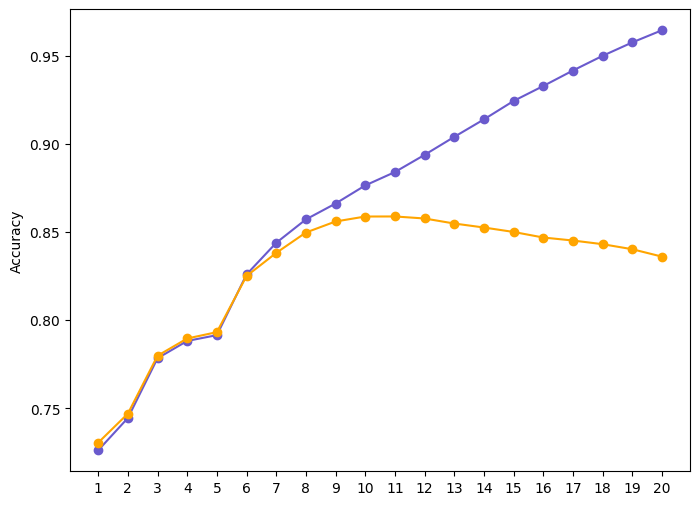

In [10]:
#plot the results
plt.figure(figsize=(8,6))
plt.plot(values,train_scores,'-o',label="train data",color='slateblue')
plt.plot(values,test_scores,'-o',label="test data",color='orange')
plt.xticks(values)
plt.ylabel('Accuracy')


Observations:
- Max_depth determines the fit of the model. 
- Underfitting occurred when max_depth was <=5.
- Overfitting: divergence in the model starts around depth=7. 

In [23]:
#Final model with specific hyperparameters 

#define the model 
model = DecisionTreeClassifier(max_depth=7,
                               min_samples_split=10, #obs before splitting
                               min_samples_leaf=5)  #end node must have this many obs


model.fit(x_train,y_train)

y_hat_train = model.predict(x_train)

train_accu = accuracy_score(y_train,y_hat_train)

y_hat_test = model.predict(x_test)
test_accu = accuracy_score(y_test,y_hat_test)


In [24]:
print(f'train scores:{train_accu:.3f} \ntest score:{test_accu:.3f}')

train scores:0.844 
test score:0.838


In [25]:
my_tree_rep = export_text(model)
print(my_tree_rep\)

|--- feature_9 <= 0.26
|   |--- feature_11 <= -2.52
|   |   |--- feature_16 <= 1.02
|   |   |   |--- feature_4 <= -3.07
|   |   |   |   |--- feature_0 <= 2.73
|   |   |   |   |   |--- feature_10 <= -2.13
|   |   |   |   |   |   |--- feature_0 <= 1.85
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  1.85
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_10 >  -2.13
|   |   |   |   |   |   |--- feature_5 <= 2.38
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  2.38
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  2.73
|   |   |   |   |   |--- feature_4 <= -4.60
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  -4.60
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  -3.07
|   |   |   |   |--- feature_15 <= 0.74
|   |   |   |   |   |--- feature_4 <= -1.98
|   |   |   |   |   |   |--- feature_0 <= 2.10
|   |   |   |   |   |   |

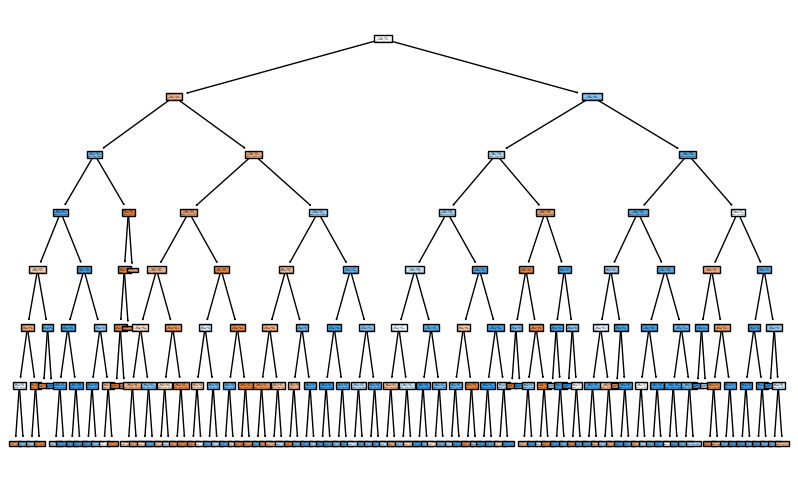

In [26]:
#Plot the decision tree 
plt.figure(figsize=(10,6))
plot_tree(model, filled=True)
plt.show()

### Perform hyperparameter Tuning using GridSearchCV
- hyperparameters: they are the parameters (knobs) in a machine learning model that are used to tweak the complexity and performance of the model. 
- Hyperparameter tuning: process of finding the best hyperparameters for a machine learning model: 
    - trial and error 
    - nested loops (like example above)
    - GridSearchCV: you give a grid of hyperparameters and it searches the best configuration (criteron, max_depth, leaf size, etc) and iterates through all of them and gives the best results
    - ML Automation API tools like Azure and DataRobot

- all the paramters you want gridsearchCV to go through 
- if you don't give it a range it will go on forever 

protip: tune no more than 4 parameters at once. If you do more than that, youre at huge risk of overfitting



In [41]:
#Define your list of hyperparameters to simulate 
param_grid = {
    'criterion':['gini','entropy'], #what do you want to use to help make the tree decide when to split
    'max_depth':[2,4,6,10,15],
    'min_samples_split':[5,10,15,20,30,50]
}

### Perform GridSearchCV

In [42]:
GS_DT_model = GridSearchCV(
    DecisionTreeClassifier(), #can also do multiple models!
    param_grid,
    cv=3, #perform X number of cross validations 
    scoring='accuracy' #tells GS what metric to use to determine the best parameters
)

Testing 3 (cv) x 2 x 5 x6 = 180 possibilities 

In [44]:
#Get the best parameters for a model across all possibilities
GS_DT_model.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50}

In [46]:
#get the accuracy score of the best params
y_test_hat = GS_DT_model.best_estimator_.predict(x_test)
accuracy_score(y_test,y_test_hat)

0.8585925925925926

In [43]:
GS_DT_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 15],
                         'min_samples_split': [5, 10, 15, 20, 30, 50]},
             scoring='accuracy')

In [47]:
pd.DataFrame(GS_DT_model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.192878,0.003371,0.002614,0.000830,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748857,0.737905,0.745667,0.744143,0.004599,49
1,0.198589,0.003294,0.003062,0.000415,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748857,0.737905,0.745667,0.744143,0.004599,49
2,0.199172,0.004672,0.003160,0.000133,gini,2,15,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748857,0.737905,0.745667,0.744143,0.004599,49
3,0.195786,0.001765,0.002343,0.000480,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748857,0.737905,0.745667,0.744143,0.004599,49
4,0.191159,0.000444,0.003174,0.000241,gini,2,30,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.748857,0.737905,0.745667,0.744143,0.004599,49


### Regularization 
- Technique used in ML and deep learning to prevent models from overfitting. 
- form of 'regression' that shrinks the coeffient toward zero to reduce the complexity of the data 
    - reduces the variance of the model without an increase in bias 
    - It discourages more complex models and prevents overfitting 
- example: in autonomous vehicles, neural networks use regularization for image classification to prevent overfitting, enhance accuracy, and recognize objects in new and unseen images captured by the sensors


Fitting involves a loss function known as the residual sum of squares (RSS)
- RSS = Actual value - Predicted values


Types of regularization: 
- Dropout regularization (most likely one to use)
    - removes a random selection, to test reduced complexity 
- Early Stopping
    - users uses a large number of epochs 
- Coadaptation
    - neurons predict patterns in the training data 
- lasso regression (L1 regularization)
    - penalizes weights in proportion to the sum of the absolute value 
- ridge 
